In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hazma.scalar_mediator import ScalarMediator
from hazma.vector_mediator import VectorMediator
from hazma.parameters import qe
:q
%matplotlib inline

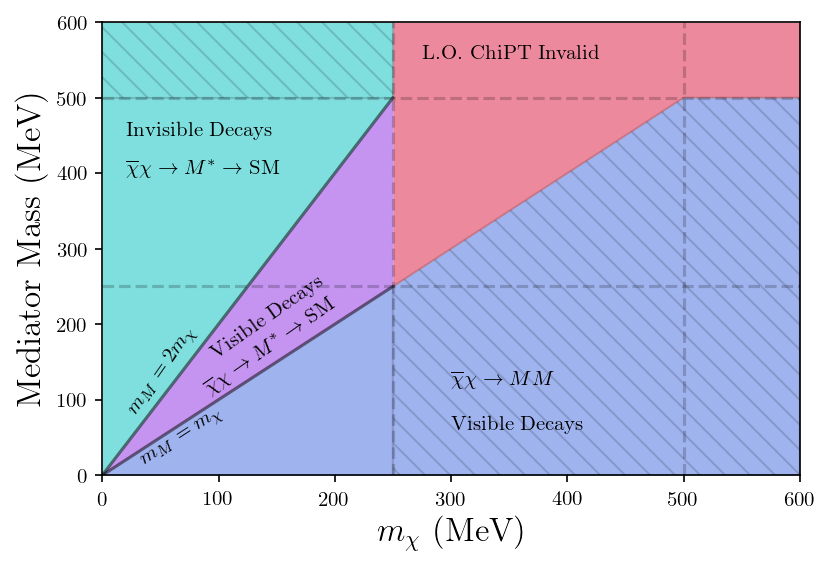

In [81]:
plt.figure(dpi=150)
plt.xlim([0., 600.])
plt.ylim([0., 600.])
plt.vlines(250., 0., 600., linestyle="dashed", alpha=0.2)
plt.vlines(500., 0., 600., linestyle="dashed", alpha=0.2)
plt.hlines(250., 0., 600., linestyle="dashed", alpha=0.2)
plt.hlines(500., 0., 600., linestyle="dashed", alpha=0.2)
plt.plot(np.linspace(0., 250., 150), np.linspace(0., 250., 150), c="k", alpha=0.5)
plt.plot(np.linspace(0., 250., 150), 2.0 * np.linspace(0., 250., 150), c="k", alpha=0.5)


#r"$S, V \to \overline{\chi}\chi$"
#r"$\overline{\chi}\chi\to S,V \to \mathrm{SM}$"
#r"$\overline{\chi}\chi\to SS, VV $"

# DM Annihilation into Mediators
plt.text(300., 120., r"$\overline{\chi}\chi\to MM$") 
plt.text(300., 60., r"Visible Decays") 
plt.fill_between([0., 500., 600.], [0., 0., 0.],[0., 500., 500.], 
                 color="royalblue", alpha=0.5, lw=0)
plt.fill([250, 500, 600, 600, 500, 250], [0, 0., 0., 500., 500, 250], fill=False, hatch='\\\\', alpha=0.15)



# Invisible Decays
plt.text(20., 450.,  r"Invisible Decays", fontsize=10)
plt.text(20., 400., r"$\overline{\chi}\chi\to M^{*} \to \mathrm{SM}$", fontsize=10) 
plt.fill_between([0., 250.], [0., 500.],[600., 600.], 
                 color="c", alpha=0.5, lw=0)
plt.fill([0, 250, 250, 0], [500, 500, 600, 600], fill=False, hatch='\\\\', alpha=0.15)

# DM Annihilation in SM
plt.text(85., 220., r"$\overline{\chi}\chi\to M^{*} \to \mathrm{SM}$", rotation=35) 
plt.text(90., 250., r"Visible Decays", rotation=35) 
plt.fill_between([0., 250.], [0., 250.],[0., 500.], 
                 color="blueviolet", alpha=0.5, lw=0)


plt.text(275., 550., "L.O. ChiPT Invalid")
plt.fill_between([250., 500., 600], [250., 500., 500.],[600., 600., 600.], 
                 color="crimson", alpha=0.5, lw=0)

plt.text(20., 180., r"$m_{M} = 2m_{\chi}$", rotation=55) 
plt.text(30., 75., r"$m_{M} = m_{\chi}$", rotation=33) 

plt.ylabel(r"Mediator Mass (MeV)", fontsize=16)
plt.xlabel(r"$m_{\chi}$ (MeV)", fontsize=16)

plt.savefig("med_and_dm_mass_phase_diagram.pdf")

In [9]:
eps = 1.0e-1


SM = ScalarMediator(250., 700., 1., 1., 1., 1. )
VM = VectorMediator(250., 700., 1., 
                    2. / 3. * eps * qe, 
                    -1. / 3. * eps * qe, 
                    -1. / 3. * eps * qe, 
                    -1 * eps * qe, 
                    -1 * eps * qe)
VM = VectorMediator(250., 700., 1., 
                    1., 0, 0, 0, 0)

## $m_{S} < m_{\chi}$

/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Users/loganmorrison/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value 

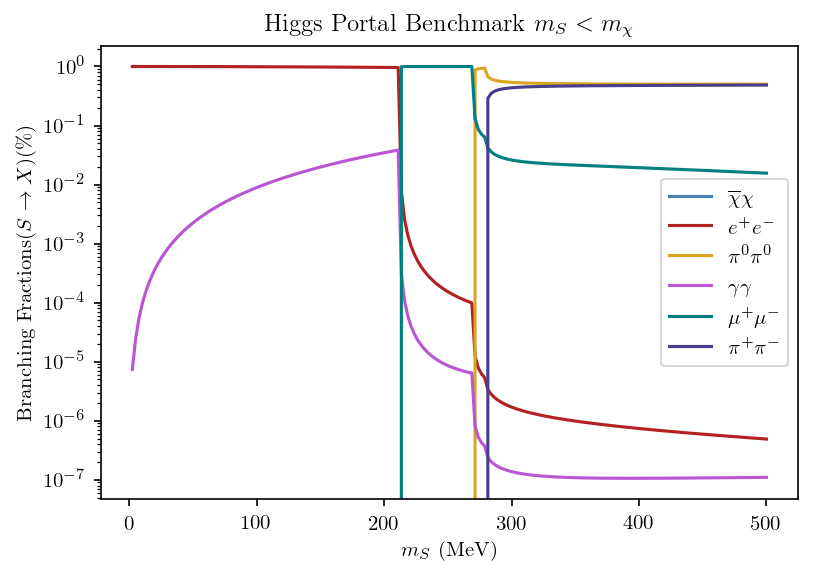

In [149]:
mx = 250.
mss = np.linspace(0., 2. * mx, 200)

stheta = 1e-3
gsxx = 1.
gsff = stheta
gsGG = 3.0 * stheta
gsFF = -5. / 6. * stheta

SMS = np.array([ScalarMediator(mx, ms, gsxx, gsff , gsGG, gsFF) for ms in mss])
sm_widths = np.array([SM.partial_widths() for SM in SMS])

widths_dict = {"e e" : np.array([sm_width["e e"] / sm_width["total"] for sm_width in sm_widths]),
"x x" : np.array([sm_width["x x"] / sm_width["total"] for sm_width in sm_widths]),
"mu mu" : np.array([sm_width["mu mu"] / sm_width["total"] for sm_width in sm_widths]),
"pi0 pi0" :np.array([sm_width["pi0 pi0"] / sm_width["total"] for sm_width in sm_widths]),
"pi pi" : np.array([sm_width["pi pi"] / sm_width["total"] for sm_width in sm_widths]),
"g g" : np.array([sm_width["g g"] / sm_width["total"] for sm_width in sm_widths])
}

tex_labels = {"e e": r"$e^{+} e^{-}$",
             "mu mu": r"$\mu^{+} \mu^{-}$",
             "g g": r"$\gamma \gamma$", 
             "pi0 pi0": r"$\pi^{0} \pi^{0}$",
             "pi pi": r"$\pi^{+} \pi^{-}$",
             "x x" : r"$\overline{\chi}\chi$"}

plt.figure(dpi=150)
plt.xlabel(r"$m_{S}$ (MeV)")
plt.ylabel(r"Branching Fractions$(S\to X) (\%)$")
plt.title(r"Higgs Portal Benchmark $m_{S} < m_{\chi}$")
plt.yscale("log")
plt.xscale("linear")
for key in widths_dict.keys():
    plt.plot(mss, widths_dict[key], label=tex_labels[key])
plt.legend()

## $m_{S} > m_{\chi}$

In [ ]:
SM.branching_fractions()

In [150]:
def v_to_cme(v, mx):
    return 2.0 * mx + mx * v**2

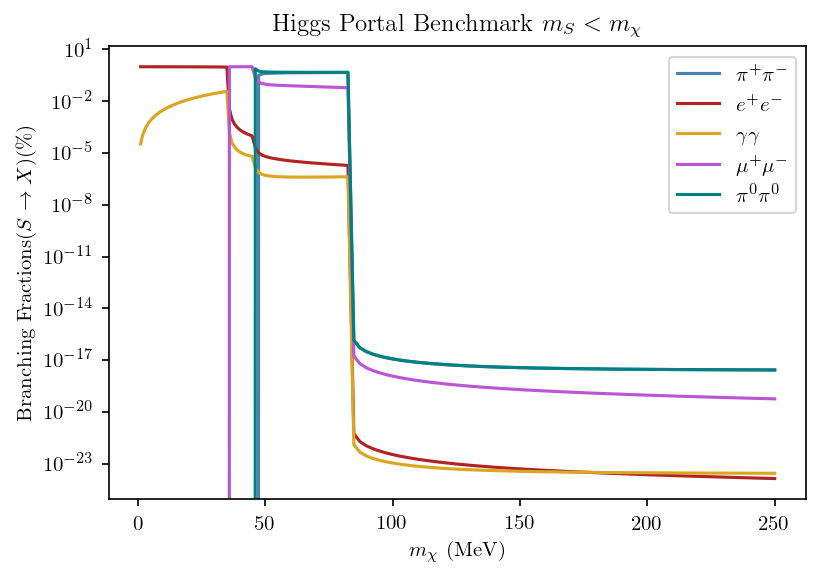

In [161]:
ms = 250.
mxs = np.logspace(0., np.log10(ms), 200)
vrel = 1.0-3

stheta = 1e-3
gsxx = 1.
gsff = stheta
gsGG = 3.0 * stheta
gsFF = -5. / 6. * stheta

SMS = np.array([ScalarMediator(mx, ms, gsxx, gsff , gsGG, gsFF) for mx in mxs])
sm_bfs = np.array([SM.branching_fractions(v_to_cme(vrel, SM.mx)) for SM in SMS])

bfs_dict = {"e e" : np.array([sm_bf["e e"]  for sm_bf in sm_bfs]),
"mu mu" : np.array([sm_bf["mu mu"]  for sm_bf in sm_bfs]),
"pi0 pi0" :np.array([sm_bf["pi0 pi0"]  for sm_bf in sm_bfs]),
"pi pi" : np.array([sm_bf["pi pi"]  for sm_bf in sm_bfs]),
"g g" : np.array([sm_bf["g g"]  for sm_bf in sm_bfs])
}

tex_labels = {"e e": r"$e^{+} e^{-}$",
             "mu mu": r"$\mu^{+} \mu^{-}$",
             "g g": r"$\gamma \gamma$", 
             "pi0 pi0": r"$\pi^{0} \pi^{0}$",
             "pi pi": r"$\pi^{+} \pi^{-}$",
             "x x" : r"$\overline{\chi}\chi$"}

plt.figure(dpi=150)
plt.xlabel(r"$m_{\chi}$ (MeV)")
plt.ylabel(r"Branching Fractions$(S\to X) (\%)$")
plt.title(r"Higgs Portal Benchmark $m_{S} < m_{\chi}$")
plt.yscale("log")
plt.xscale("linear")
for key in bfs_dict.keys():
    plt.plot(mxs, bfs_dict[key], label=tex_labels[key])
plt.legend()